# FMCG----Hierarchical clustering-K means-PCA 

In [48]:
import os
os.chdir(r'c:\Users\Sunita\Project_2')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

In [50]:
# Reading Datafile
data = pd.read_csv('Project_Data_2.csv', index_col = 0, thousands=',')
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [51]:
# check for any missing values
print((data == 0).sum())

1990    1
1991    0
1992    0
1993    0
1994    1
1995    0
1996    2
1997    1
1998    2
1999    1
2000    2
2001    2
2002    0
2003    3
2004    1
2005    2
2006    2
2007    2
dtype: int64


In [52]:
data.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [53]:
#Remove zero 
data = data.replace(0, np.NaN)
data.dropna(inplace=True)

In [57]:
data.isnull().sum()

year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [58]:
#Change the headers to country and year accordingly.
data.index.names = ['country']
data.columns.names = ['year']

In [59]:
data.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429,422,415,407.0,397,397.0,387.0,374.0,373.0,346.0,326.0,304,308.0,283.0,267.0,251.0,238.0
Albania,42.0,40,41,42,42.0,43,42.0,44.0,43.0,42.0,40.0,34.0,32,32.0,29.0,29.0,26.0,22.0
Algeria,45.0,44,44,43,43.0,42,43.0,44.0,45.0,46.0,48.0,49.0,50,51.0,52.0,53.0,55.0,56.0
Andorra,39.0,37,35,33,32.0,30,28.0,23.0,24.0,22.0,20.0,20.0,21,18.0,19.0,18.0,17.0,19.0
Angola,514.0,514,513,512,510.0,508,512.0,363.0,414.0,384.0,530.0,335.0,307,281.0,318.0,331.0,302.0,294.0


In [60]:
#Cleanse the data if required and remove null or blank values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
1990    203 non-null float64
1991    203 non-null int64
1992    203 non-null int64
1993    203 non-null int64
1994    203 non-null float64
1995    203 non-null int64
1996    203 non-null float64
1997    203 non-null float64
1998    203 non-null float64
1999    203 non-null float64
2000    203 non-null float64
2001    203 non-null float64
2002    203 non-null int64
2003    203 non-null float64
2004    203 non-null float64
2005    203 non-null float64
2006    203 non-null float64
2007    203 non-null float64
dtypes: float64(13), int64(5)
memory usage: 30.1+ KB


In [61]:
data.describe()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,199.374384,198.965517,195.049261,193.522167,191.635468,189.438424,181.37931,183.802956,181.019704,183.231527,180.921182,181.128079,179.931034,179.852217,176.679803,174.458128,172.226601,170.374384
std,233.897218,230.741538,226.321942,221.541770,217.798561,213.692154,194.49938,192.994538,189.438774,195.875720,199.904541,205.718864,205.304616,210.884389,211.532552,211.987044,211.876337,213.147064
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,42.000000,40.500000,37.500000,37.000000,35.500000,34.500000,34.50000,33.000000,31.000000,28.500000,27.000000,25.000000,26.000000,24.500000,22.500000,21.500000,21.000000,19.500000
50%,96.000000,93.000000,91.000000,88.000000,90.000000,92.000000,89.00000,93.000000,92.000000,91.000000,90.000000,84.000000,79.000000,72.000000,71.000000,68.000000,69.000000,69.000000
75%,302.000000,318.500000,323.000000,318.500000,317.500000,316.500000,312.00000,322.500000,333.500000,348.000000,329.000000,320.000000,306.000000,303.500000,299.500000,284.000000,287.000000,281.500000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.00000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


In [62]:
# Applying the EDA part and think which algorithm should be applied here.
data.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007'],
      dtype='object', name='year')

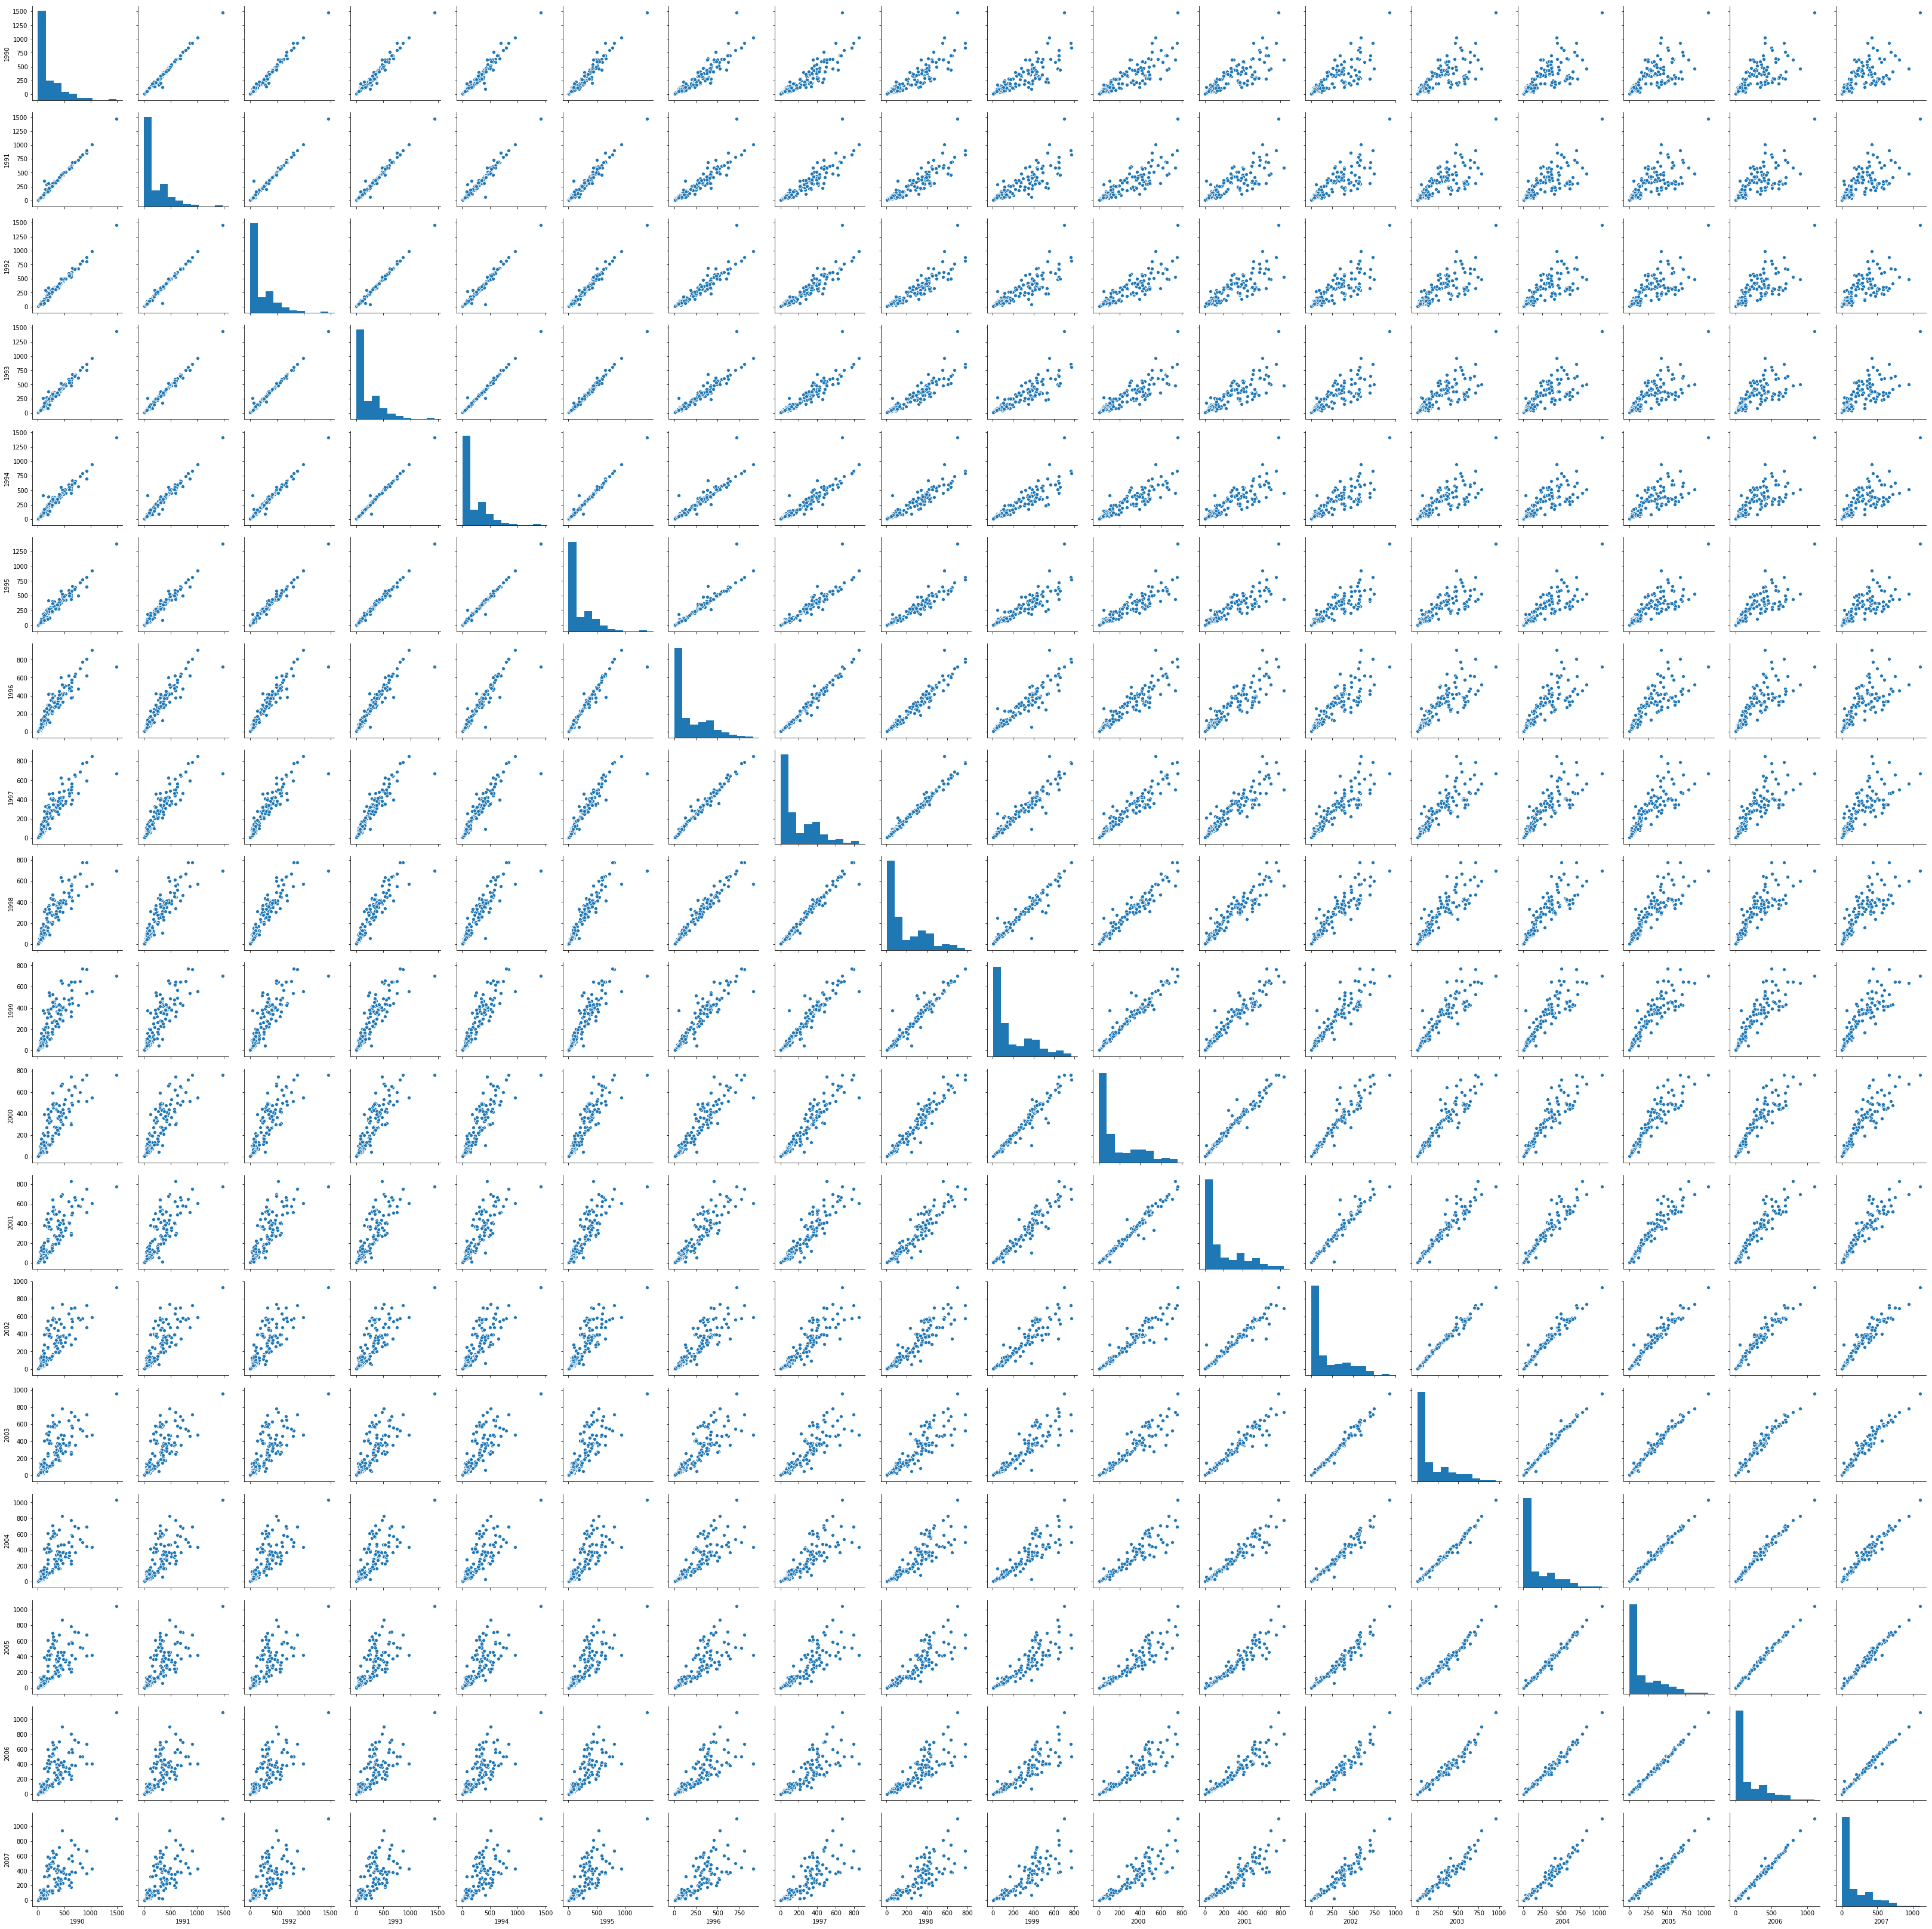

In [63]:
sns.pairplot(data)

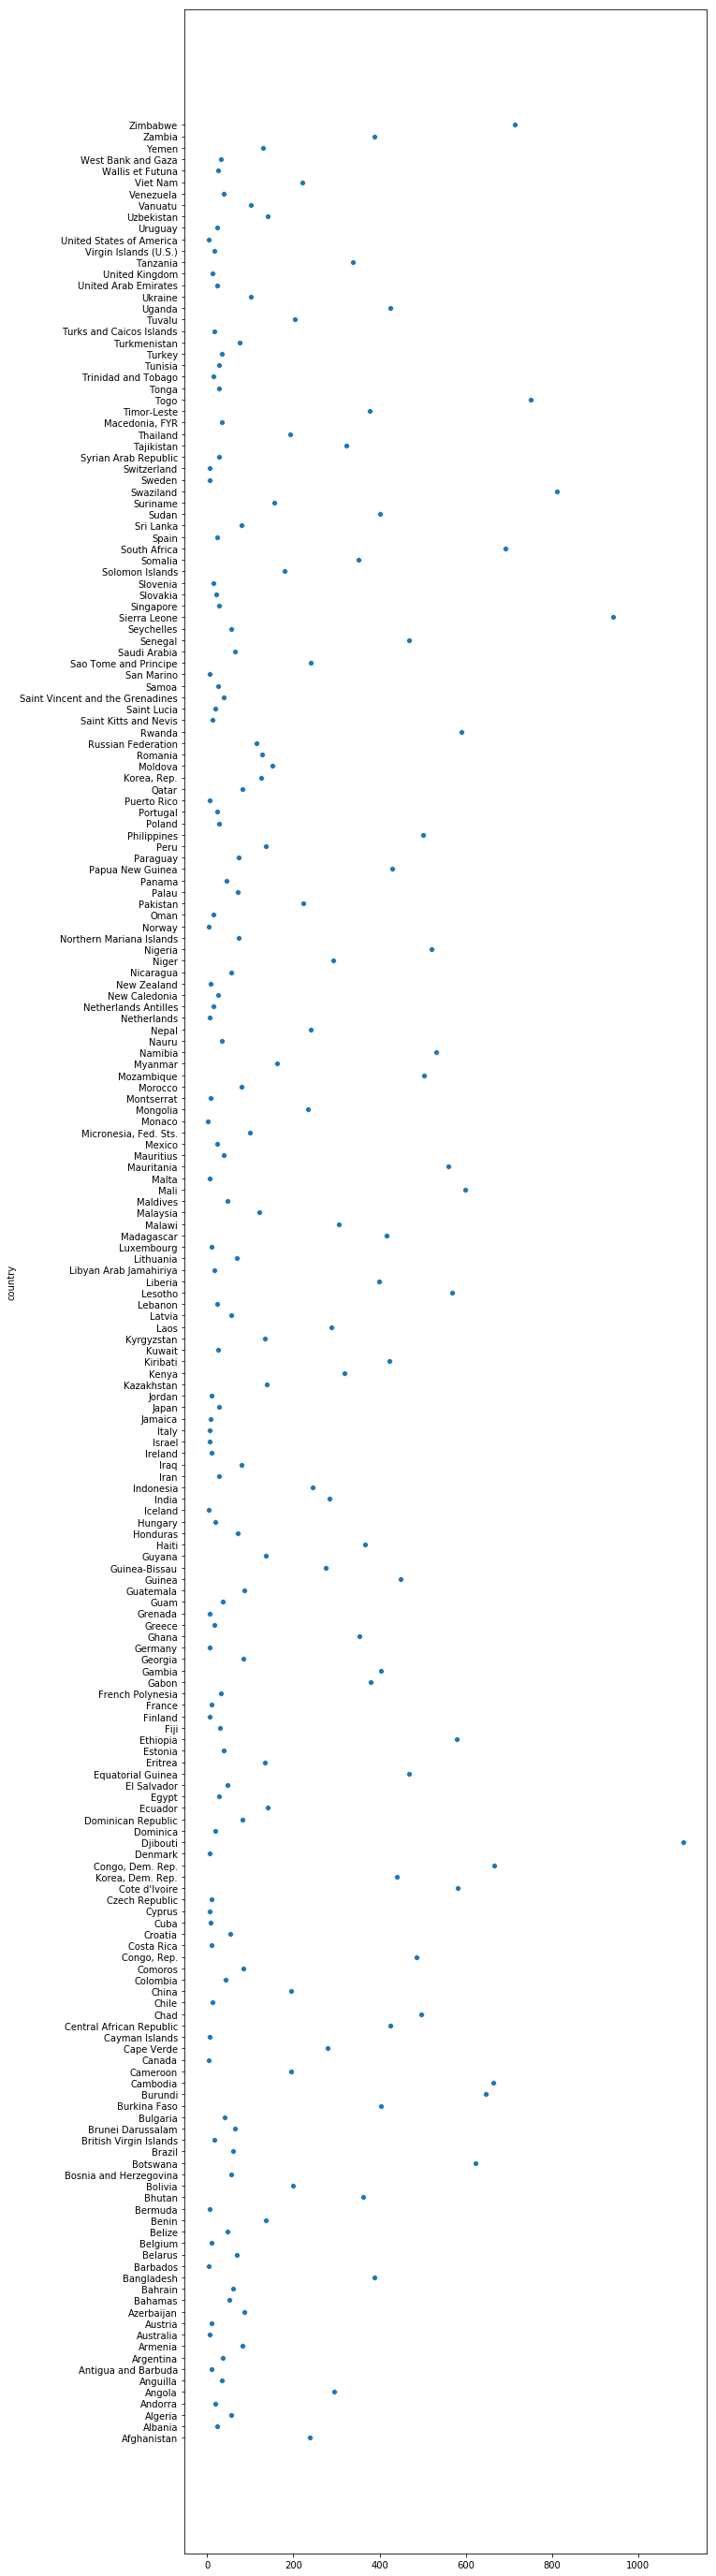

In [66]:
plt.figure(figsize=(10,50))
sns.scatterplot(y=data.index[:], x=data['2007'].values)



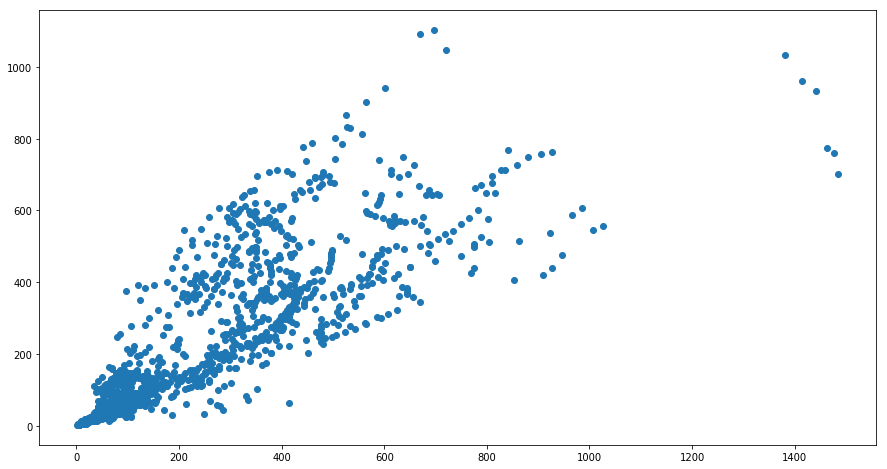

In [68]:
plt.figure(figsize=(15,8))
plt.scatter(x=data.iloc[:, 0:9], y=data.iloc[:, 9:])

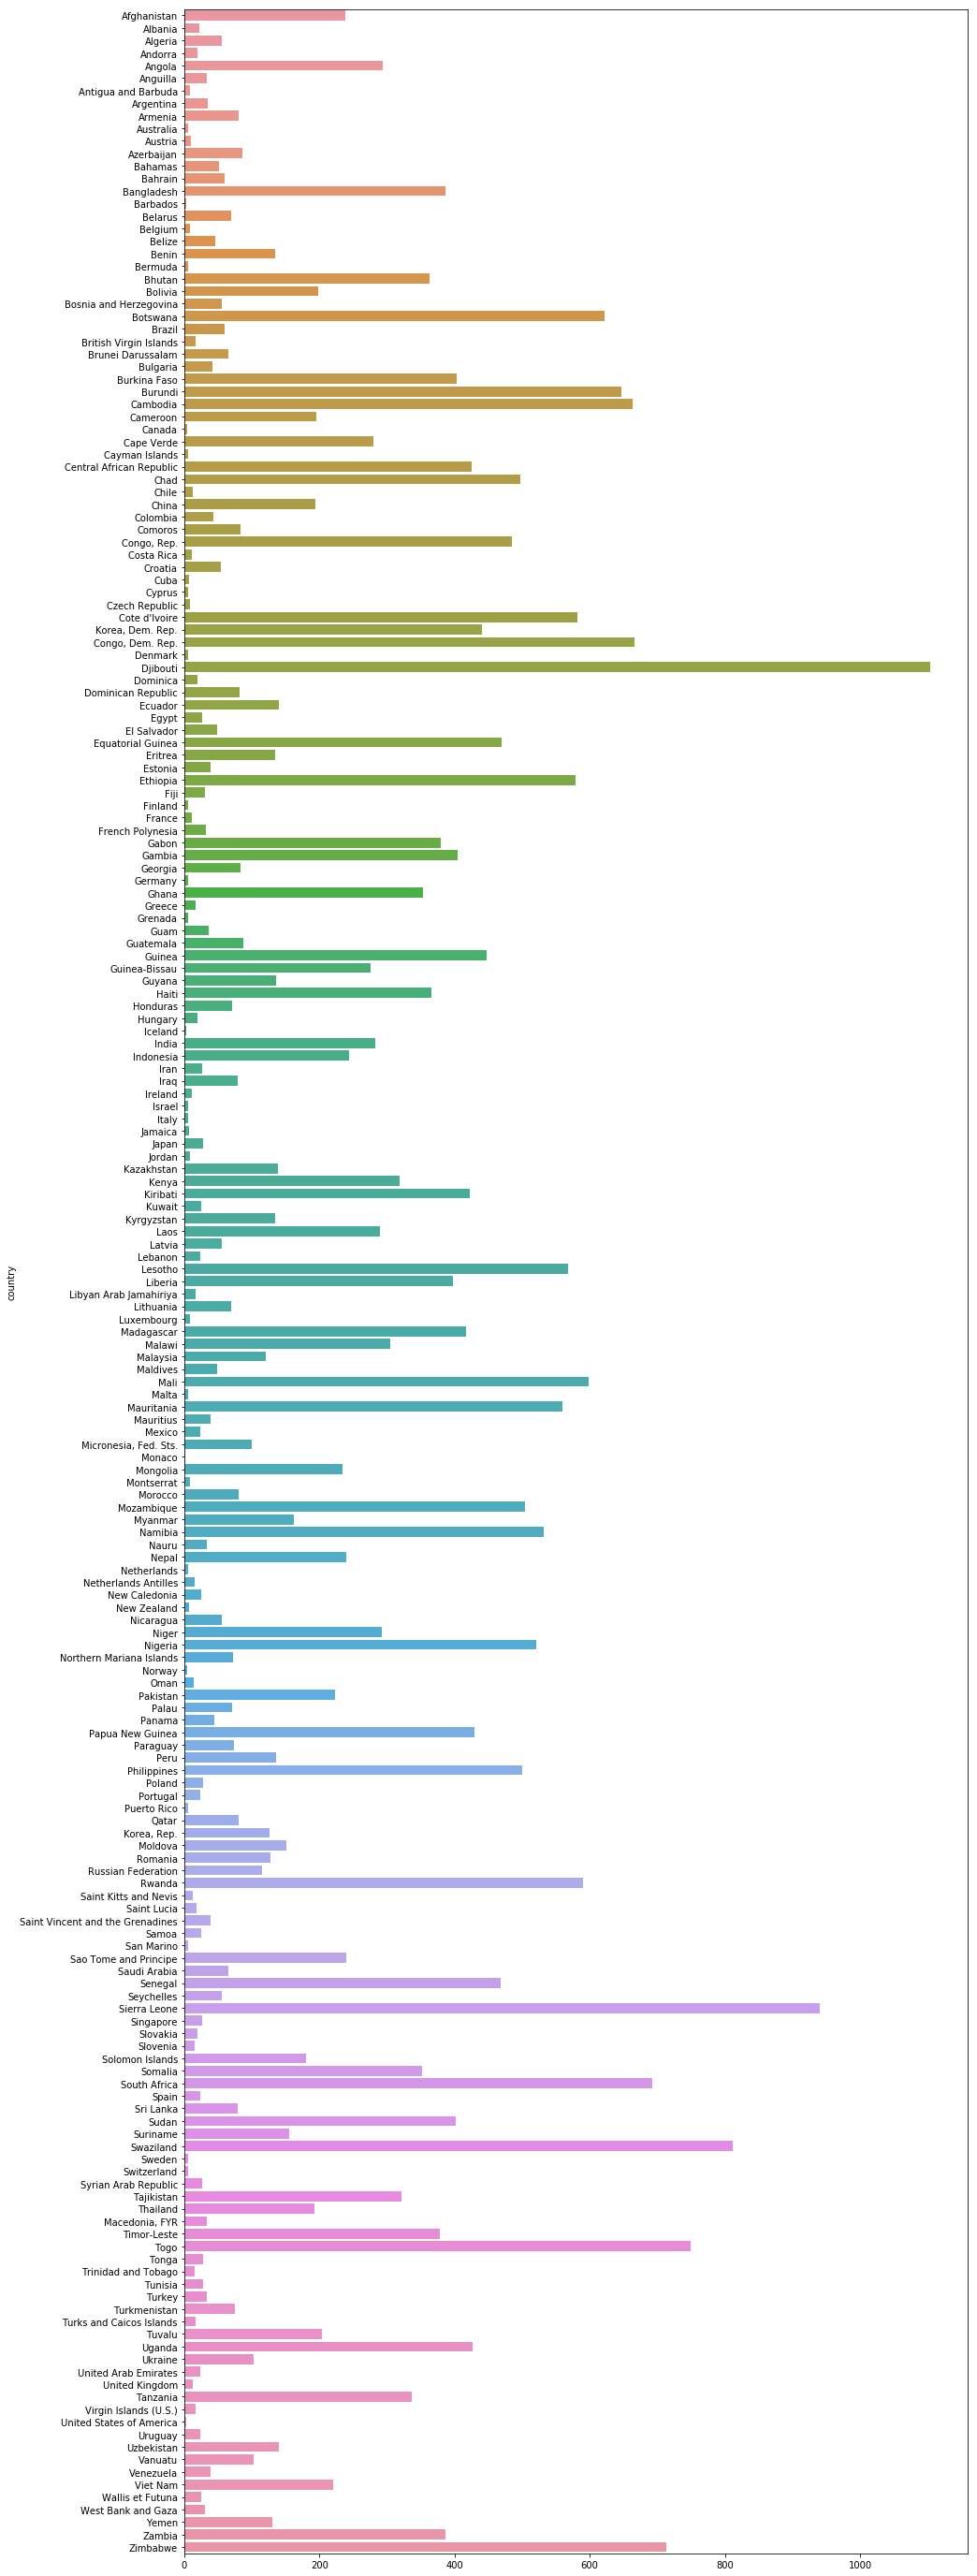

In [67]:

plt.figure(figsize=(15,50))
sns.barplot(y=data.index[:], x=data['2007'].values)

In [70]:
#Applying PCA first
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
data_2d = pca.transform(data)

In [72]:
# Creating a new Data frame to store PCA values 

data_2df = pd.DataFrame(data_2d)
data_2df.index = data.index
data_2df.columns = ['PC1','PC2']
data_2df.head()

,PC1,PC2
country,,
Afghanistan,721.112241,204.203491
Albania,-624.518353,6.551066
Algeria,-580.553947,-35.056048
Andorra,-673.004682,12.876423
Angola,979.462066,295.086986


In [73]:
pca.explained_variance_ratio_

array([0.91951574, 0.06099766])

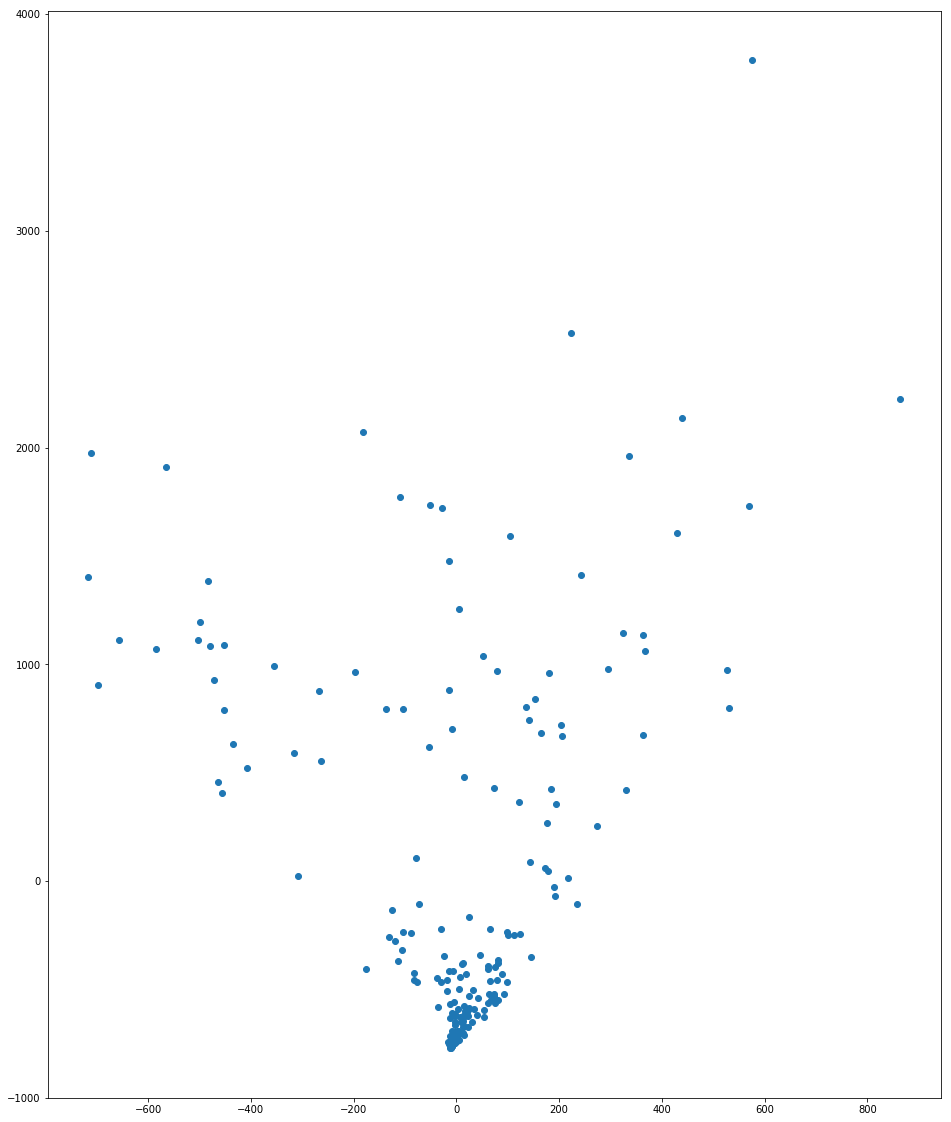

In [74]:
plt.figure(figsize=(16,20))
plt.scatter(x=data_2df['PC2'], y=data_2df['PC1'])

In [75]:
#Plot elbow chart to find out optimal number of clusters

X = data_2df[['PC1', 'PC2']].values

In [76]:
# KMeans Clustering

from sklearn.cluster import KMeans

wcss = []
# within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [77]:
wcss

[158370909.69223297,
 41669732.19619407,
 24752463.87966818,
 19583958.735499803,
 15058756.02325625,
 11360375.53117133,
 9532604.975395046,
 7665702.7110835,
 6236199.29774985,
 5362740.846559824]

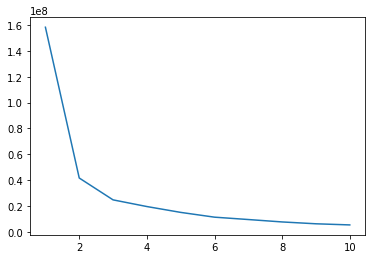

In [78]:
plt.plot(range(1,11), wcss)

In [79]:
# n_clusters = 3
# we can fit kmeans algorithm with it

kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [80]:
y_kmeans

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0])

In [81]:
dfc = data_2df.copy()

In [82]:
Y = pd.DataFrame(y_kmeans, index=data.index)

In [83]:
# Created a copy of orignal dataset to avoid data loss

dfc = pd.concat([dfc, Y], axis=1)
dfc.head()

,PC1,PC2,0
country,,,
Afghanistan,721.112241,204.203491,0
Albania,-624.518353,6.551066,1
Algeria,-580.553947,-35.056048,1
Andorra,-673.004682,12.876423,1
Angola,979.462066,295.086986,0


In [84]:
dfc = dfc.rename(columns={0: 'Y'})
dfc.head()

,PC1,PC2,Y
country,,,
Afghanistan,721.112241,204.203491,0
Albania,-624.518353,6.551066,1
Algeria,-580.553947,-35.056048,1
Andorra,-673.004682,12.876423,1
Angola,979.462066,295.086986,0


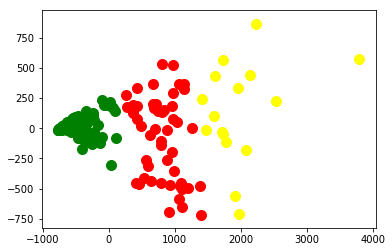

In [85]:
# Plotting the distribution of the clusters

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='green')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='yellow')

In [86]:
# silhouette_score is used to measure the accuarcy of model
# in case of kMeans clusters or hierarchical clusters

from sklearn.metrics import silhouette_score
print('Silhouette Score of KMeans: ',silhouette_score(X, y_kmeans))
print(round(silhouette_score(X, y_kmeans)))

Silhouette Score of KMeans:  0.681421462709148
1.0


In [87]:
# The Silhouette score is 1, that means our cluster model is accrate

In [89]:
##Hierarchical Clustering
# Hierarchical clustering is of type AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0], dtype=int64)

In [90]:
y_hier = pd.DataFrame(y_hc, index=data.index)

In [91]:
dfc = pd.concat([dfc, y_hier], axis=1)
dfc.head()

,PC1,PC2,Y,0
country,,,,
Afghanistan,721.112241,204.203491,0,0
Albania,-624.518353,6.551066,1,1
Algeria,-580.553947,-35.056048,1,1
Andorra,-673.004682,12.876423,1,1
Angola,979.462066,295.086986,0,0


In [92]:
dfc = dfc.rename(columns={0: 'Y_Hierarchical', 'Y': 'Y_Kmeans'})

In [93]:
dfc.head()

,PC1,PC2,Y_Kmeans,Y_Hierarchical
country,,,,
Afghanistan,721.112241,204.203491,0,0
Albania,-624.518353,6.551066,1,1
Algeria,-580.553947,-35.056048,1,1
Andorra,-673.004682,12.876423,1,1
Angola,979.462066,295.086986,0,0


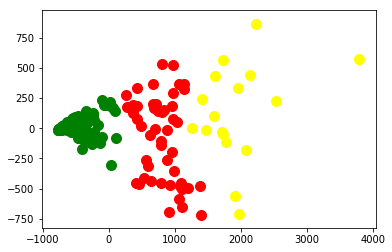

In [94]:
# Plotting the same for hierarchical clusters

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='green')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='yellow')

In [95]:
# Accuracy of the Hierarchical model

from sklearn.metrics import silhouette_score
print('Silhouette Score of KMeans: ',silhouette_score(X, y_hc))
print(round(silhouette_score(X, y_hc)))

Silhouette Score of KMeans:  0.6764208561303039
1.0


In [96]:
# Model is giving less accuarcy than KMeans algorithm

In [97]:
##Group the countries using the principal components and KMeans
zero = []

for i in dfc.index[dfc['Y_Kmeans']==0]:
    zero.append(i)

In [98]:
one = []

for i in dfc.index[dfc['Y_Kmeans']==1]:
    one.append(i)

In [99]:
two = []

for i in dfc.index[dfc['Y_Kmeans']==2]:
    two.append(i)

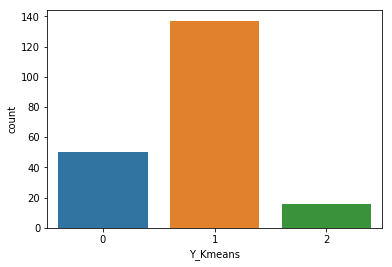

In [100]:
country = [zero, one, two]
sns.countplot(dfc['Y_Kmeans'])
plt.show()

In [101]:
##10. Which countries are consistent and which are largest importers of the good based on scale and position of cluster
print("Following countries having Consistent: ", two)

Following countries having Consistent:  ['Bangladesh', 'Bhutan', 'Cambodia', 'Korea, Dem. Rep.', 'Djibouti', 'Kiribati', 'Mali', 'Mauritania', 'Namibia', 'Philippines', 'Sierra Leone', 'South Africa', 'Swaziland', 'Timor-Leste', 'Togo', 'Zambia']


In [102]:
print("The largest importers of the goods are: ", one)

The largest importers of the goods are:  ['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libyan Arab Jamahiriya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Micronesia